In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_pickle("/Users/alexastrauss/Downloads/econ_sample.pkl")
df.head()
df.columns

,tweetid,userid,screen_name,date,lang,state,country,tweet_type,friends_count,verified,hashtag,rt_screen,rt_userid,rt_text,sent_vader,qtd_screen,qtd_userid,qtd_text
15204,1456699658852503552,758103579286581248,janvinjoey,2021-11-05 19:07:17+00:00,en,NJ,United States,retweeted_tweet_without_comment,8080,False,[],TomiLahren,4.686470e+08,My dad is now one of those people who is force...,-0.8852,NaN,NaN,NaN
106384,1391133712335753216,48149612,coco_roberts13,2021-05-08 20:51:37+00:00,en,NaN,NaN,retweeted_tweet_without_comment,852,False,[],SenSanders,2.944231e+07,Providing an extra $300 a week in unemployment...,-0.1813,NaN,NaN,NaN
81608,1334342185605615616,381244658,0lufem,2020-12-03 03:42:22+00:00,en,NaN,NaN,retweeted_tweet_without_comment,341,False,[],Ilhan,1.082334e+18,It’s been 200 days since the House passed the ...,0.9251,NaN,NaN,NaN
56475,1282109428645294080,112902058,InvestWatchBlog,2020-07-12 00:28:02+00:00,en,NaN,United States,original,480,False,[],NaN,NaN,NaN,-0.4404,NaN,NaN,NaN
8381,1475859762071982080,361703035,Unbreakable_B,2021-12-28 16:02:42+00:00,en,MA,United States,retweeted_tweet_without_comment,544,False,[],foxstrology,1.014295e+18,no free tests. no free masks. no lockdown. no ...,-0.7650,NaN,NaN,NaN


Index(['tweetid', 'userid', 'screen_name', 'date', 'lang', 'state', 'country',
       'tweet_type', 'friends_count', 'verified', 'hashtag', 'rt_screen',
       'rt_userid', 'rt_text', 'sent_vader', 'qtd_screen', 'qtd_userid',
       'qtd_text'],
      dtype='object')

In [14]:
df.lang.unique()

array(['en', 'ro', 'in', 'et', 'und', 'tl', 'th', 'hi', 'ta', 'cy', 'ja',
       'fr', 'ca', 'qht', 'de', 'ne', 'cs', 'mr', 'es', 'sl', 'fi', 'tr',
       'zh', 'pa', 'ht', 'sv', 'da', 'gu', 'te', 'kn', 'vi', 'lt', 'pt',
       'nl', 'ur', 'ml', 'ko', 'bn', 'pl', 'no', 'it'], dtype=object)

In [3]:
df['sent_vader']
df['country'].unique().tolist()
df['friends_count'].value_counts()

15204    -0.8852
106384   -0.1813
81608     0.9251
56475    -0.4404
8381     -0.7650
           ...  
136351   -0.5812
17371     0.8065
108753   -0.3182
31214     0.4055
58332    -0.4019
Name: sent_vader, Length: 1000000, dtype: float64

['United States',
 nan,
 'South Africa',
 'India',
 'United Kingdom',
 'Canada',
 'South Korea',
 'Nigeria',
 'Australia',
 'Indonesia',
 'Germany',
 'Morocco',
 'Belize',
 'Kenya',
 'Ireland',
 'Nepal',
 'Latvia',
 'Philippines',
 'Somalia',
 'Ghana',
 'Venezuela',
 'Japan',
 'Antarctica',
 'Hong Kong',
 'Israel',
 'Italy',
 'Russia',
 'Turkey',
 'Colombia',
 'Uganda',
 'China',
 'Iran',
 'Jamaica',
 'Netherlands',
 'Singapore',
 'France',
 'Jersey',
 'Malaysia',
 'Pakistan',
 'Vietnam',
 'Denmark',
 'Switzerland',
 'Poland',
 'Spain',
 'Mexico',
 'Cambodia',
 'Brazil',
 'St Lucia',
 'Vanuatu',
 'Sri Lanka',
 'Ethiopia',
 'Maldives',
 'Zimbabwe',
 'United Arab Emirates',
 'Egypt',
 'New Zealand',
 'Hungary',
 'Taiwan',
 'El Salvador',
 'Namibia',
 'Puerto Rico',
 'Chile',
 'Lebanon',
 'Dominican Republic',
 'Portugal',
 'Belgium',
 'Tunisia',
 'Costa Rica',
 'Argentina',
 'Togo',
 'Luxembourg',
 'Rwanda',
 'Thailand',
 'The Gambia',
 'Peru',
 'Zambia',
 'Guyana',
 'Sweden',
 'Qatar',


friends_count
0         8257
5001      4788
1         3585
5000      2869
3         2799
          ... 
38651        1
47174        1
115315       1
20050        1
65392        1
Name: count, Length: 27461, dtype: int64

In [4]:
#add column of political affilation during 2020 election depending on the state origin of tweet
political_affil_state = {
    'MT': 'Red', 'ID': 'Red', 'UT': 'Red', 'WY': 'Red',
    'SD': 'Red', 'ND': 'Red', 'NE': 'Red', 'IA': 'Red',
    'MO': 'Red', 'KS': 'Red', 'OK': 'Red', 'TX': 'Red',
    'AR': 'Red', 'LA': 'Red', 'MS': 'Red', 'AL': 'Red',
    'TN': 'Red', 'KY': 'Red', 'IN': 'Red', 'OH': 'Red',
    'WV': 'Red', 'NC': 'Red', 'SC': 'Red', 'FL': 'Red', 'AK': 'Red', #Red states
    
    'WA': 'Blue', 'OR': 'Blue', 'NV': 'Blue', 'CA': 'Blue',
    'NM': 'Blue', 'CO': 'Blue', 'MN': 'Blue', 'IL': 'Blue',
    'NY': 'Blue', 'VA': 'Blue', 'NJ': 'Blue', 'MD': 'Blue',
    'DE': 'Blue', 'CT': 'Blue', 'MA': 'Blue', 'RI': 'Blue',
    'NH': 'Blue', 'VT': 'Blue', 'ME': 'Blue', 'HI': 'Blue', #Blue states
    
    'AZ': 'Flip', 'WI': 'Flip', 'MI': 'Flip', 'GA': 'Flip', 
    'PA': 'Flip'} #Flip states

def get_political_affil(state):
    #default to 'Unknown' if the state abbreviation is not found in the mapping
    return political_affil_state.get(state, 'Unknown')
df['political_affil'] = df['state'].apply(get_political_affil)
print(df)

                    tweetid               userid      screen_name  \
15204   1456699658852503552   758103579286581248       janvinjoey   
106384  1391133712335753216             48149612   coco_roberts13   
81608   1334342185605615616            381244658           0lufem   
56475   1282109428645294080            112902058  InvestWatchBlog   
8381    1475859762071982080            361703035    Unbreakable_B   
...                     ...                  ...              ...   
136351  1306412174873591808            403008358       AmalShal27   
17371   1322074083429896193  1122608986228973568         jtmcdon1   
108753  1339297617910652929             85931738    jolenetschida   
31214   1357770186259124224           1966831262   WhiskeyBooksGo   
58332   1456422410740244490   824454522869350400     BrendaJetson   

                            date lang state        country  \
15204  2021-11-05 19:07:17+00:00   en    NJ  United States   
106384 2021-05-08 20:51:37+00:00   en   NaN    

In [6]:
df.rt_text = df.rt_text.fillna("")
df.rt_text.str.lower().str.contains("poverty").value_counts()

rt_text
False    986484
True      13516
Name: count, dtype: int64

                    tweetid               userid    screen_name  \
15204   1456699658852503552   758103579286581248     janvinjoey   
8381    1475859762071982080            361703035  Unbreakable_B   
15591   1504777510524968962             17187236         12News   
72151   1281461585555402752            131351552      ramiel001   
54902   1341192705548972032             69073144         DB1973   
...                     ...                  ...            ...   
117030  1316528163615367168           4078380645     wbhillman3   
117857  1313656743315079169             26278305           AZWS   
112172  1364605677436608512  1349069777248116736      Can__Alex   
63166   1356612574805172227           1579204362     CherYork51   
17371   1322074083429896193  1122608986228973568       jtmcdon1   

                            date lang state        country  \
15204  2021-11-05 19:07:17+00:00   en    NJ  United States   
8381   2021-12-28 16:02:42+00:00   en    MA  United States   
15591  20

/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/2136011229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['date'] = pd.to_datetime(result['date'])
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/2136011229.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  result['year_month'] = result['date'].dt.to_period('M')  #'YYYY-MM' format
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/2136011229.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Change in Sentiment Score Over Time (Monthly) by Political Affiliation')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Sentiment Score (VADER)')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '2020-01'),
  Text(1, 0, '2020-02'),
  Text(2, 0, '2020-03'),
  Text(3, 0, '2020-04'),
  Text(4, 0, '2020-05'),
  Text(5, 0, '2020-06'),
  Text(6, 0, '2020-07'),
  Text(7, 0, '2020-08'),
  Text(8, 0, '2020-09'),
  Text(9, 0, '2020-10'),
  Text(10, 0, '2020-11'),
  Text(11, 0, '2020-12'),
  Text(12, 0, '2021-01'),
  Text(13, 0, '2021-02'),
  Text(14, 0, '2021-03'),
  Text(15, 0, '2021-04'),
  Text(16, 0, '2021-05'),
  Text(17, 0, '2021-06'),
  Text(18, 0, '2021-07'),
  Text(19, 0, '2021-08'),
  Text(20, 0, '2021-09'),
  Text(21, 0, '2021-10'),
  Text(22, 0, '2021-11'),
  Text(23, 0, '2021-12'),
  Text(24, 0, '2022-01'),
  Text(25, 0, '2022-02'),
  Text(26, 0, '2022-03'),
  Text(27, 0, '2022-04'),
  Text(28, 0, '2022-05'),
  Text(29, 0, '2022-06')])

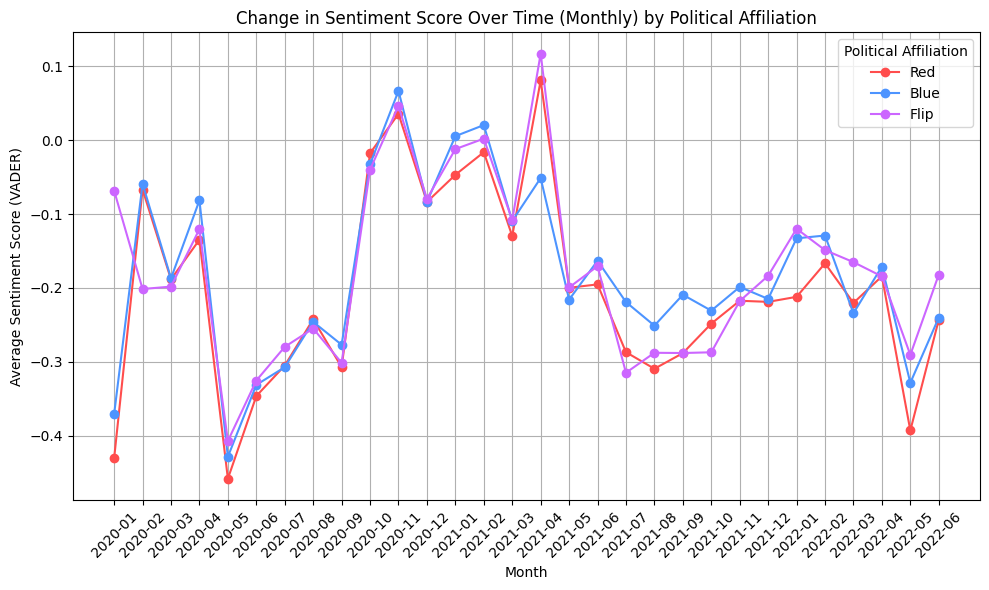

In [153]:
#######


#group by political affiliation and state to count the number of tweets
state_counts = df.groupby(['political_affil', 'state']).size().reset_index(name='tweet_count')

#get top 5 states for each political affiliation
top_5_red = state_counts[state_counts['political_affil'] == 'Red'].nlargest(5, 'tweet_count')
top_5_blue = state_counts[state_counts['political_affil'] == 'Blue'].nlargest(5, 'tweet_count')
top_5_flip = state_counts[state_counts['political_affil'] == 'Flip'].nlargest(5, 'tweet_count')
top_states_combined = pd.concat([top_5_red, top_5_blue, top_5_flip])

#filter the original DataFrame to keep only rows from the top states
result = df[df['state'].isin(top_states_combined['state']) & df['political_affil'].isin(top_states_combined['political_affil'])]

#check 'date' column is in datetime format
result['date'] = pd.to_datetime(result['date'])

#new column 'year_month' to group by year and month
result['year_month'] = result['date'].dt.to_period('M')  #'YYYY-MM' format

print(result)

#group by 'year_month' and 'political_affil', then calculate the average sentiment score for each month
sentiment_by_month = result.groupby(['year_month', 'political_affil'])['sent_vader'].mean().reset_index()

#plot the sentiment score over time for each political affiliation (monthly)
plt.figure(figsize=(10, 6))

#color for each political affiliation
color_map = {
    'Red': '#ff4d4d',  #red
    'Blue': '#4d94ff',  #blue
    'Flip': '#cc66ff'   #purple
}

#plot each political affiliation with the corresponding color
for affil in ['Red', 'Blue', 'Flip']:
    sentiment_group = sentiment_by_month[sentiment_by_month['political_affil'] == affil]
    plt.plot(sentiment_group['year_month'].astype(str), sentiment_group['sent_vader'],
             marker='o', linestyle='-', label=affil, color=color_map[affil])


plt.title('Change in Sentiment Score Over Time (Monthly) by Political Affiliation')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score (VADER)')
plt.xticks(rotation=45)
plt.legend(title="Political Affiliation")
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_analysis_Overall.png', format='png', dpi=300)
plt.show()

/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/2949627008.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['date'] = pd.to_datetime(result['date'])
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/2949627008.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  result['year_month'] = result['date'].dt.to_period('M')  # 'YYYY-MM' format
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/2949627008.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Change in Sentiment of Tweets Containing "Vaccination" Over Time (Monthly) by Political Affiliation')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Sentiment Score (VADER)')

([<matplotlib.axis.XTick at 0x2923339d0>,
 [Text(18353.0, 0, '2020-04'),
  Text(18475.0, 0, '2020-08'),
  Text(18475.0, 0, '2020-08'),
  Text(18475.0, 0, '2020-08'),
  Text(18567.0, 0, '2020-11'),
  Text(18567.0, 0, '2020-11'),
  Text(18597.0, 0, '2020-12'),
  Text(18597.0, 0, '2020-12'),
  Text(18597.0, 0, '2020-12'),
  Text(18628.0, 0, '2021-01'),
  Text(18628.0, 0, '2021-01'),
  Text(18628.0, 0, '2021-01'),
  Text(18659.0, 0, '2021-02'),
  Text(18659.0, 0, '2021-02'),
  Text(18659.0, 0, '2021-02'),
  Text(18687.0, 0, '2021-03'),
  Text(18687.0, 0, '2021-03'),
  Text(18687.0, 0, '2021-03'),
  Text(18718.0, 0, '2021-04'),
  Text(18718.0, 0, '2021-04'),
  Text(18748.0, 0, '2021-05'),
  Text(18748.0, 0, '2021-05'),
  Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06'),
  Text(18779.0, 0, '2021-06'),
  Text(18779.0, 0, '2021-06'),
  Text(18809.0, 0, '2021-07'),
  Text(18809.0, 0, '2021-07'),
  Text(18809.0, 0, '2021-07'),
  Text(18840.0, 0, '2021-08'),
  Text(18840.0, 0, '2021-08'

Text(2020-09-01 00:00:00, -0.45, 'FDA Approval')

Text(2021-02-01 00:00:00, 0.7, 'Effectiveness Report')

Text(2021-09-01 00:00:00, 0.1, 'Cases Dropping')

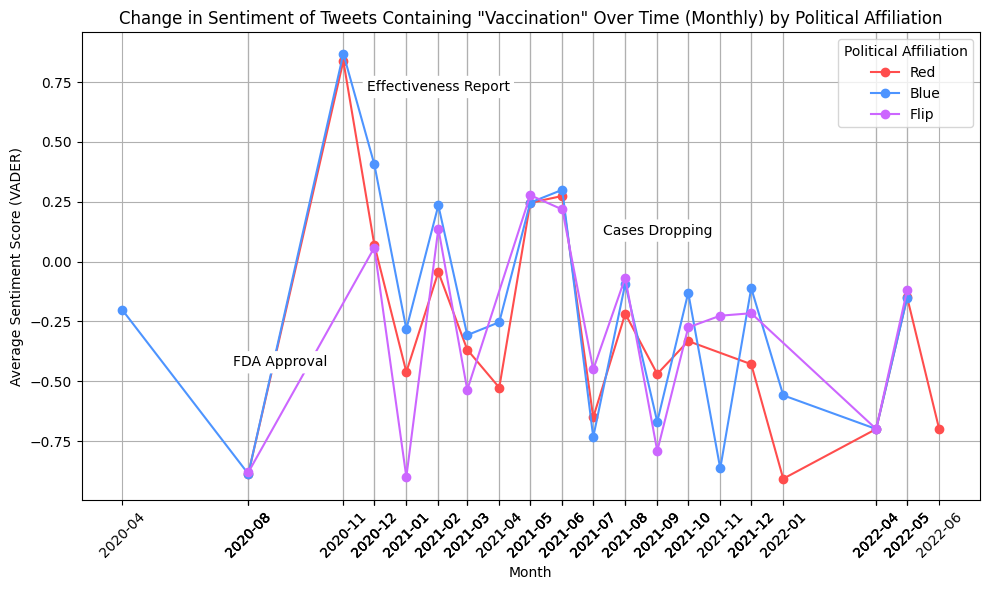

In [154]:
#filter the DataFrame for tweets containing the keyword "Vaccination"
keyword = "Vaccination"
result1 = df[df['rt_text'].str.contains(keyword, case=False, na=False)]  # Filter by keyword

#group by political affiliation and state to count the number of tweets
state_counts = result1.groupby(['political_affil', 'state']).size().reset_index(name='tweet_count')

#get the top 5 states for each political affiliation
top_5_red = state_counts[state_counts['political_affil'] == 'Red'].nlargest(5, 'tweet_count')
top_5_blue = state_counts[state_counts['political_affil'] == 'Blue'].nlargest(5, 'tweet_count')
top_5_flip = state_counts[state_counts['political_affil'] == 'Flip'].nlargest(5, 'tweet_count')
top_states_combined = pd.concat([top_5_red, top_5_blue, top_5_flip])

#filter the original DataFrame to keep only rows from the top states
result = result1[result1['state'].isin(top_states_combined['state']) & result1['political_affil'].isin(top_states_combined['political_affil'])]

#check that the 'date' column is in datetime format
result['date'] = pd.to_datetime(result['date'])

#new column 'year_month' to group by year and month
result['year_month'] = result['date'].dt.to_period('M')  # 'YYYY-MM' format

#group by 'year_month' and 'political_affil', then calculate the average sentiment score for each month
sentiment_by_month = result.groupby(['year_month', 'political_affil'])['sent_vader'].mean().reset_index()

#sort the 'year_month' column in chronological order to ensure proper x-axis ordering
sentiment_by_month['year_month'] = sentiment_by_month['year_month'].dt.to_timestamp()  #datetime
sentiment_by_month = sentiment_by_month.sort_values(by='year_month', ascending=True)  #sort chronologically

#plot the sentiment score over time for each political affiliation (monthly)
plt.figure(figsize=(10, 6))

#color for each political affiliation
color_map = {
    'Red': '#ff4d4d',  # Red
    'Blue': '#4d94ff',  # Blue
    'Flip': '#cc66ff'   # Purple
}

#plot each political affiliation with the corresponding color
for affil in ['Red', 'Blue', 'Flip']:
    sentiment_group = sentiment_by_month[sentiment_by_month['political_affil'] == affil]
    plt.plot(sentiment_group['year_month'], sentiment_group['sent_vader'],
             marker='o', linestyle='-', label=affil, color=color_map[affil])


plt.title('Change in Sentiment of Tweets Containing "Vaccination" Over Time (Monthly) by Political Affiliation')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score (VADER)')
plt.xticks(sentiment_by_month['year_month'], sentiment_by_month['year_month'].dt.strftime('%Y-%m'), rotation=45)

#ddd annotations
plt.annotate('FDA Approval', 
             xy=(pd.Timestamp('2020-08-01'), 0),
             xytext=(pd.Timestamp('2020-09-01'), -0.45),
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.annotate('Effectiveness Report', 
             xy=(pd.Timestamp('2020-11-01'), 0), 
             xytext=(pd.Timestamp('2021-2-01'), 0.7), 
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.annotate('Cases Dropping', 
             xy=(pd.Timestamp('2021-05-01'), 0),
             xytext=(pd.Timestamp('2021-09-01'), 0.1), 
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))


plt.legend(title="Political Affiliation")
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_analysis_Vaccination.png', format='png', dpi=300)  #save as image
plt.show()

/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/1136587628.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['date'] = pd.to_datetime(result['date'])
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/1136587628.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  result['year_month'] = result['date'].dt.to_period('M')  # 'YYYY-MM' format
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/1136587628.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Change in Sentiment of Tweets Containing "Biden" Over Time (Monthly) by Political Affiliation')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Sentiment Score (VADER)')

([<matplotlib.axis.XTick at 0x2c5c19300>,
 [Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18322.0, 0, '2020-03'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18353.0, 0, '2020-04'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18383.0, 0, '2020-05'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18414.0, 0, '2020-06'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18444.0, 0, '2020-07'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18475.0, 0, '2020-08'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18506.0, 0, '2020-09'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18536.0, 0, '2020-10'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11'),
  Text(18567.0, 0, '2020-11'),
  Text(18567.0, 0, '2020-11'),
  Text(18597.0, 0, '2020-12'),
  Text(18597.0, 0, '2020-12'),
  Text(18597.0, 0, '2020-12'

Text(2020-12-01 00:00:00, -0.75, 'Presidential Debate')

Text(2021-07-01 00:00:00, 0.5, 'President Address')

Text(2021-05-01 00:00:00, -0.47, 'Announce Plans')

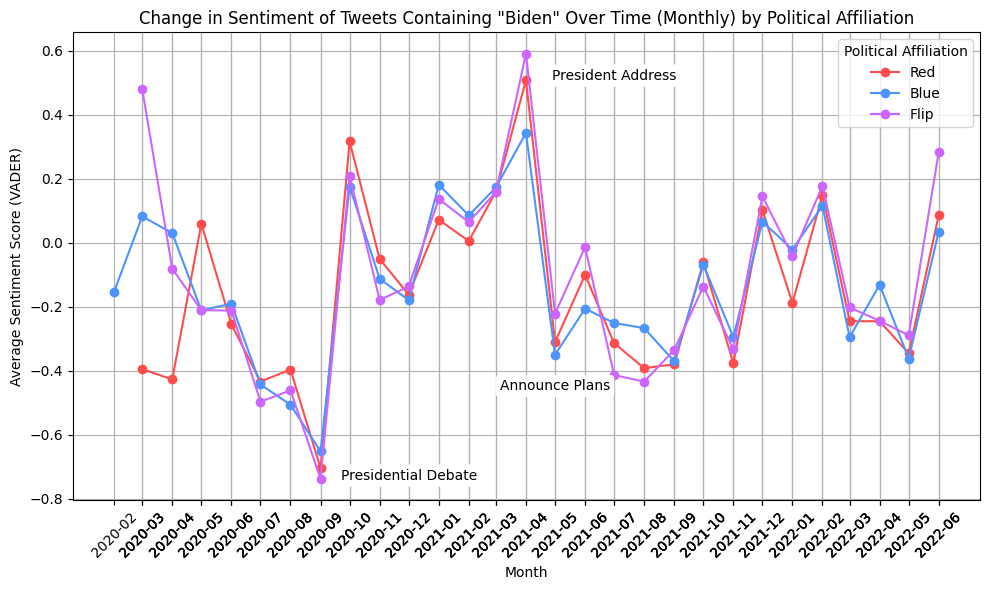

In [151]:
#filter the DataFrame for tweets containing the keyword "Biden"
keyword = "Biden"
result1 = df[df['rt_text'].str.contains(keyword, case=False, na=False)]  # Filter by keyword

#group by political affiliation and state to count the number of tweets
state_counts = result1.groupby(['political_affil', 'state']).size().reset_index(name='tweet_count')

#get the top 5 states for each political affiliation
top_5_red = state_counts[state_counts['political_affil'] == 'Red'].nlargest(5, 'tweet_count')
top_5_blue = state_counts[state_counts['political_affil'] == 'Blue'].nlargest(5, 'tweet_count')
top_5_flip = state_counts[state_counts['political_affil'] == 'Flip'].nlargest(5, 'tweet_count')
top_states_combined = pd.concat([top_5_red, top_5_blue, top_5_flip])

#filter the original DataFrame to keep only rows from the top states
result = result1[result1['state'].isin(top_states_combined['state']) & result1['political_affil'].isin(top_states_combined['political_affil'])]

#check that the 'date' column is in datetime format
result['date'] = pd.to_datetime(result['date'])

#new column 'year_month' to group by year and month
result['year_month'] = result['date'].dt.to_period('M')  # 'YYYY-MM' format

#group by 'year_month' and 'political_affil', then calculate the average sentiment score for each month
sentiment_by_month = result.groupby(['year_month', 'political_affil'])['sent_vader'].mean().reset_index()

#sort the 'year_month' column in chronological order to ensure proper x-axis ordering
sentiment_by_month['year_month'] = sentiment_by_month['year_month'].dt.to_timestamp()  #datetime
sentiment_by_month = sentiment_by_month.sort_values(by='year_month', ascending=True)  #sort chronologically

#plot the sentiment score over time for each political affiliation (monthly)
plt.figure(figsize=(10, 6))

#color for each political affiliation
color_map = {
    'Red': '#ff4d4d',  # Red
    'Blue': '#4d94ff',  # Blue
    'Flip': '#cc66ff'   # Purple
}

#plot each political affiliation with the corresponding color
for affil in ['Red', 'Blue', 'Flip']:
    sentiment_group = sentiment_by_month[sentiment_by_month['political_affil'] == affil]
    plt.plot(sentiment_group['year_month'], sentiment_group['sent_vader'],
             marker='o', linestyle='-', label=affil, color=color_map[affil])


plt.title('Change in Sentiment of Tweets Containing "Biden" Over Time (Monthly) by Political Affiliation')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score (VADER)')
plt.xticks(sentiment_by_month['year_month'], sentiment_by_month['year_month'].dt.strftime('%Y-%m'), rotation=45)

#annotations for key events
plt.annotate('Presidential Debate', 
             xy=(pd.Timestamp('2020-08-01'), 0), 
             xytext=(pd.Timestamp('2020-12-01'), -0.75),
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.annotate('President Address', 
             xy=(pd.Timestamp('2021-03-01'), 0), 
             xytext=(pd.Timestamp('2021-07-01'), 0.5),
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.annotate('Announce Plans', 
             xy=(pd.Timestamp('2021-04-01'), 0), 
             xytext=(pd.Timestamp('2021-05-01'), -0.47),
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.legend(title="Political Affiliation")
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_analysis_Biden.png', format='png', dpi=300)  #save as image
plt.show()

/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/638716912.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['date'] = pd.to_datetime(result['date'])
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/638716912.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  result['year_month'] = result['date'].dt.to_period('M')  # 'YYYY-MM' format
/var/folders/2d/9d8wknmx1xdb64c0myhx8fl40000gn/T/ipykernel_17562/638716912.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Change in Sentiment of Tweets Containing "Stimulus" Over Time (Monthly) by Political Affiliation')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Sentiment Score (VADER)')

([<matplotlib.axis.XTick at 0x2c883e6b0>,
 [Text(18262.0, 0, '2020-01'),
  Text(18262.0, 0, '2020-01'),
  Text(18293.0, 0, '2020-02'),
  Text(18293.0, 0, '2020-02'),
  Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18322.0, 0, '2020-03'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18353.0, 0, '2020-04'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18383.0, 0, '2020-05'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18414.0, 0, '2020-06'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18444.0, 0, '2020-07'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18475.0, 0, '2020-08'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18506.0, 0, '2020-09'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18536.0, 0, '2020-10'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11'),
  Text(18567.0, 0, '2020-11'

Text(2020-03-01 00:00:00, -0.28, 'Stimulus Check')

Text(2021-01-01 00:00:00, 0.22, 'Stimulus Check')

Text(2021-03-01 00:00:00, -0.2, 'Stimulus Check')

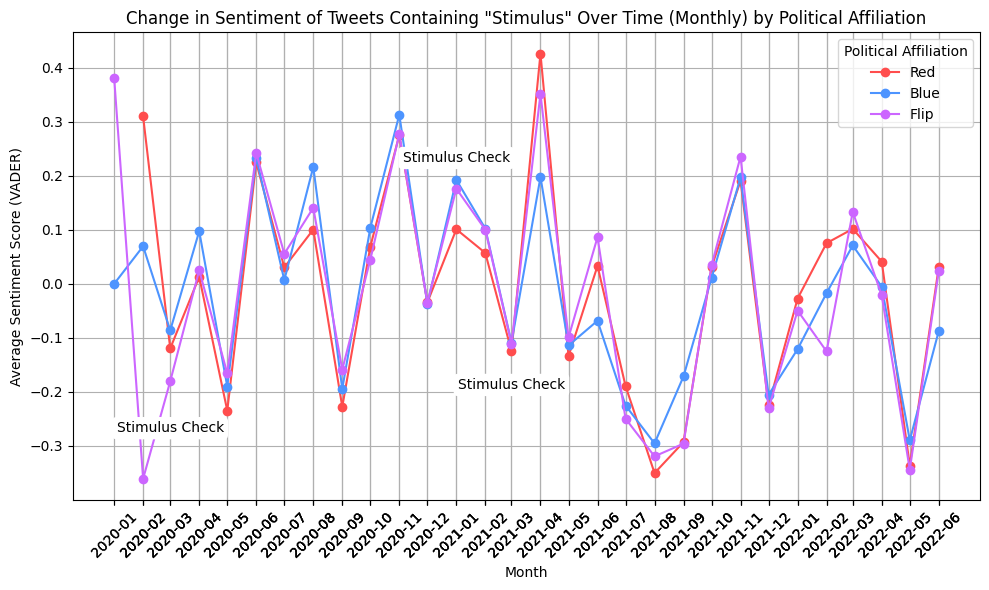

In [161]:
#filter the DataFrame for tweets containing the keyword "Stimulus"
keyword = "Stimulus"
result1 = df[df['rt_text'].str.contains(keyword, case=False, na=False)]  # Filter by keyword

#group by political affiliation and state to count the number of tweets
state_counts = result1.groupby(['political_affil', 'state']).size().reset_index(name='tweet_count')

#get the top 5 states for each political affiliation
top_5_red = state_counts[state_counts['political_affil'] == 'Red'].nlargest(5, 'tweet_count')
top_5_blue = state_counts[state_counts['political_affil'] == 'Blue'].nlargest(5, 'tweet_count')
top_5_flip = state_counts[state_counts['political_affil'] == 'Flip'].nlargest(5, 'tweet_count')
top_states_combined = pd.concat([top_5_red, top_5_blue, top_5_flip])

#filter the original DataFrame to keep only rows from the top states
result = result1[result1['state'].isin(top_states_combined['state']) & result1['political_affil'].isin(top_states_combined['political_affil'])]

#check that the 'date' column is in datetime format
result['date'] = pd.to_datetime(result['date'])

#new column 'year_month' to group by year and month
result['year_month'] = result['date'].dt.to_period('M')  #'YYYY-MM' format

#group by 'year_month' and 'political_affil', then calculate the average sentiment score for each month
sentiment_by_month = result.groupby(['year_month', 'political_affil'])['sent_vader'].mean().reset_index()

#sort the 'year_month' column in chronological order to ensure proper x-axis ordering
sentiment_by_month['year_month'] = sentiment_by_month['year_month'].dt.to_timestamp()  #datetime
sentiment_by_month = sentiment_by_month.sort_values(by='year_month', ascending=True)  #sort chronologically

#plot the sentiment score over time for each political affiliation (monthly)
plt.figure(figsize=(10, 6))

#color for each political affiliation
color_map = {
    'Red': '#ff4d4d',  # Red
    'Blue': '#4d94ff',  # Blue
    'Flip': '#cc66ff'   # Purple
}

#plot each political affiliation with the corresponding color
for affil in ['Red', 'Blue', 'Flip']:
    sentiment_group = sentiment_by_month[sentiment_by_month['political_affil'] == affil]
    plt.plot(sentiment_group['year_month'], sentiment_group['sent_vader'],
             marker='o', linestyle='-', label=affil, color=color_map[affil])


plt.title('Change in Sentiment of Tweets Containing "Stimulus" Over Time (Monthly) by Political Affiliation')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score (VADER)')
plt.xticks(sentiment_by_month['year_month'], sentiment_by_month['year_month'].dt.strftime('%Y-%m'), rotation=45)

#annotations for key events
plt.annotate('Stimulus Check', 
             xy=(pd.Timestamp('2020-03-01'), 0),
             xytext=(pd.Timestamp('2020-03-01'), -0.28),
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.annotate('Stimulus Check', 
             xy=(pd.Timestamp('2020-12-01'), 0),
             xytext=(pd.Timestamp('2021-01-01'), 0.22),
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.annotate('Stimulus Check', 
             xy=(pd.Timestamp('2021-03-01'), 0),
             xytext=(pd.Timestamp('2021-03-01'), -0.2),
             fontsize=10,
             horizontalalignment='center', 
             verticalalignment='bottom',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))


plt.legend(title="Political Affiliation")
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_analysis_Stimulus.png', format='png', dpi=300)  #save as image
plt.show()